# Basic Imports

In [3]:
# Modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import (confusion_matrix, auc, classification_report, dcg_score, f1_score, precision_recall_curve,\
                             precision_score, recall_score, roc_auc_score, roc_curve)
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb

import pycaret
import pandas_profiling
import matplotlib.pyplot as plt
import itertools

import pickle
import joblib
import math
import os
print(os.listdir('../../../data/santander'))

import warnings
warnings.filterwarnings('ignore')

['processed', 'raw']


# Load Data

In [6]:
path = '../../../data/santander'
df_train = pd.read_pickle(path + '/processed/processed_train_hj.pickle')
df_test = pd.read_pickle(path + '/processed/processed_test_hj.pickle')

In [8]:
df_train.shape, df_test.shape

((147093, 186), (67938, 185))

In [9]:
df_train.sample(3)

target     var_0     var_1     var_2     var_3     var_4     var_5  \
46301       0  1.115234  0.223145  0.248291  1.152344 -0.646973  0.050049   
35233       0 -1.514648 -0.965820 -0.344971 -0.325684  0.822754 -0.166016   
84650       0  0.069824  0.401367  0.670410 -2.281250 -2.160156 -0.314453   

          var_6     var_8     var_9  ...   var_190   var_191   var_192  \
46301 -0.260010  0.323730 -0.682617  ... -0.348633  1.483398  0.503906   
35233  0.041687  1.113281 -0.812500  ... -0.946777  1.443359 -0.756348   
84650 -0.886230  0.289551 -1.052734  ... -2.425781 -0.250977 -0.609375   

        var_193   var_194   var_195   var_196   var_197   var_198   var_199  
46301  0.893066 -0.046112  0.877441 -0.095398 -0.028320  0.473389  0.230225  
35233  0.927246 -0.389648  0.278076  1.578125 -1.071289  0.520020  0.606445  
84650  0.729004  1.114258 -0.181519  2.208984  2.203125 -1.075195  0.182617  

[3 rows x 186 columns]

# Profile Data

In [12]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_train.sample(frac=0.1), 
                        explorative=True,
                        correlations=None,
                        interactions=None
                       )
profile.to_file('profile_data.html')

# Initial Modeling using pycaret

In [16]:
from pycaret.classification import *
exp = setup(df_train, 
            target = 'target', 
            session_id=777, 
            train_size=0.7,
            fold=2,
            experiment_name='santander_01')

In [17]:
best_model = compare_models(include = ['catboost','lightgbm','xgboost'], fold=2, sort='AUC')

In [20]:
lgbm = create_model('lightgbm')
# tuned_lgbm = tune_model(estimator=lgbm,
#                        optimize='AUC', )

In [32]:
plot_model(lgbm, plot = 'auc', )

ValueError: Plot Not Available. Please see docstring for list of available Plots.

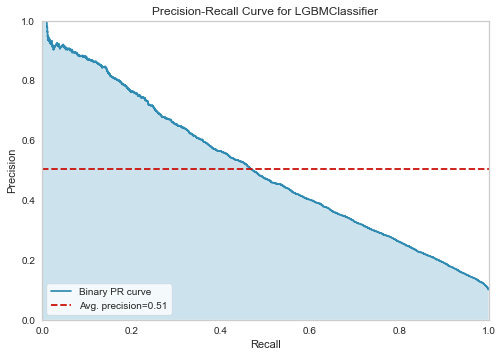

In [30]:
plot_model(lgbm, plot = 'pr')

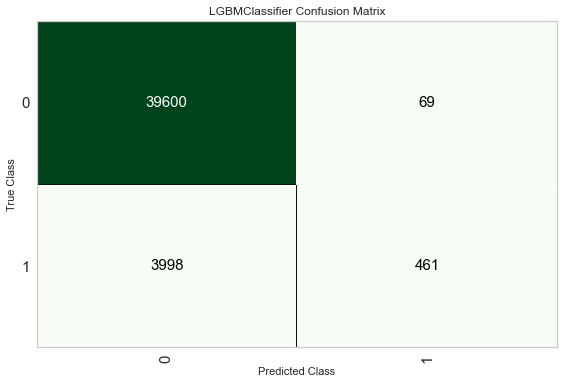

In [33]:
plot_model(lgbm, plot = 'confusion_matrix')

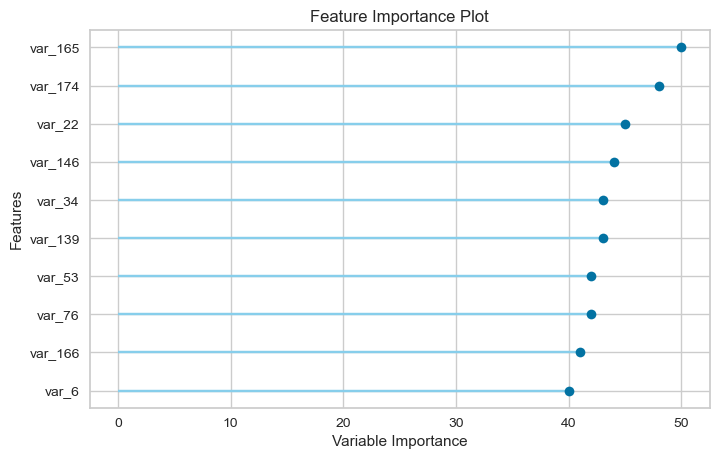

In [35]:
plot_model(lgbm, plot = 'feature')

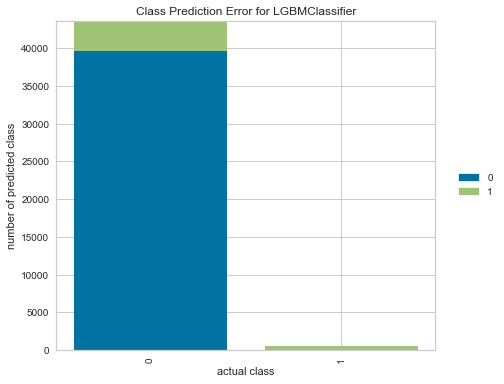

In [47]:
plot_model(lgbm, 'error')

In [38]:
X = get_config('X')
X.head()

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0 -0.270752  0.624512 -1.185547  0.681641 -0.791504 -1.538086 -0.242065   
1  0.676758  0.277588 -0.513184 -0.539062  0.302734  0.517090 -1.763672   
2 -0.127441  0.130859  0.667480 -0.197998 -0.931152 -0.406982 -0.498779   
3  0.274658 -0.034485 -0.813477  0.074280 -0.738281 -0.952637 -0.611328   
4 -0.263184  0.171875 -0.713867 -0.895020  0.071350 -1.093750  1.014648   

      var_8     var_9    var_11  ...   var_190   var_191   var_192   var_193  \
0 -0.861328  0.420898 -1.895508  ... -0.971680 -0.095276  0.447266  1.911133   
1  1.559570 -1.305664  1.343750  ...  0.065186 -0.775879 -0.169800 -0.404541   
2  1.842773  0.547363 -1.015625  ... -0.276123  0.886719 -0.812500 -0.470459   
3 -1.797852  0.092041  1.491211  ...  1.028320 -0.688477 -1.399414  1.471680   
4 -0.993164 -1.284180 -0.440430  ...  2.083984  0.273926  2.275391 -0.715820   

    var_194   var_195   var_196   var_197   var_198   var_199  
0 -0.815430 -1.520508 -1.073242 -0.130127  0.826172 -0.503418  
1  1.154297 -2.296875  1.618164 -0.698242 -0.382568 -0.354248  
2  1.607422  0.792969  0.958496  1.498047  0.696289  0.547852  
3 -1.498047  0.961914 -0.301514  0.642090  0.706543  0.529785  
4 -0.969727 -0.818359  1.085938  0.930664 -1.092773  0.140991  

[5 rows x 185 columns]

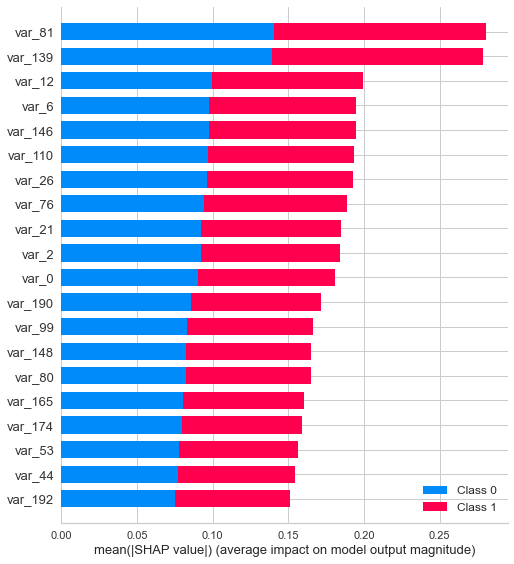

In [40]:
interpret_model(lgbm)

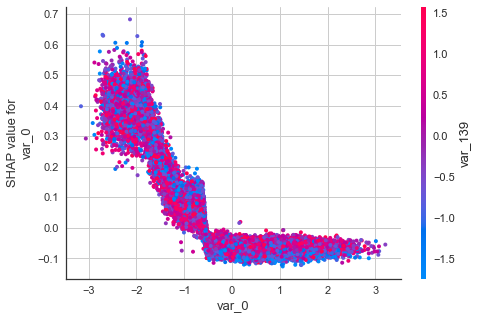

In [41]:
interpret_model(lgbm, plot='correlation')

In [48]:
interpret_model(lgbm, plot = 'reason', observation = 2)

In [56]:
# interpret_model(lgbm, plot='pdp')

In [ ]:
X = df_train.drop('target', axis=1)
y = df_train['target']

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=777, stratify=y)
df_train.shape, df_test.shape